In [18]:
#import 2020 MLB BATTER Dataset 
import pandas as pd 
file = './mlb-player-stats-Batters.csv'
raw = pd.read_csv(file)

In [19]:
raw.head()

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Whit Merrifield,KC,2B,32,60,248,38,70,12,0,...,3,12,33,0,1,4,0.282,0.325,0.440,0.765
1,Jose Abreu,CWS,1B,34,60,240,43,76,15,0,...,0,18,59,0,1,3,0.317,0.370,0.617,0.987
2,Dansby Swanson,ATL,SS,27,60,237,49,65,15,0,...,0,22,71,0,1,4,0.274,0.345,0.464,0.809
3,Francisco Lindor,CLE,SS,27,60,236,30,61,13,0,...,2,24,41,0,2,4,0.258,0.335,0.415,0.750
4,Trevor Story,COL,SS,28,59,235,41,68,13,4,...,3,24,63,0,0,0,0.289,0.355,0.519,0.874


In [20]:
#add 'XBH' Extra base hit column
raw['XBH'] = raw['2B'] + raw['3B'] + raw['HR']

In [21]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  612 non-null    object 
 1   Team    612 non-null    object 
 2   Pos     612 non-null    object 
 3   Age     612 non-null    int64  
 4   G       612 non-null    int64  
 5   AB      612 non-null    int64  
 6   R       612 non-null    int64  
 7   H       612 non-null    int64  
 8   2B      612 non-null    int64  
 9   3B      612 non-null    int64  
 10  HR      612 non-null    int64  
 11  RBI     612 non-null    int64  
 12  SB      612 non-null    int64  
 13  CS      612 non-null    int64  
 14  BB      612 non-null    int64  
 15  SO      612 non-null    int64  
 16  SH      612 non-null    int64  
 17  SF      612 non-null    int64  
 18  HBP     612 non-null    int64  
 19  AVG     612 non-null    float64
 20  OBP     612 non-null    float64
 21  SLG     612 non-null    float64
 22  OP

In [35]:
#select columns that will be used for analysis
#AB 타수 At Bats
#H 안타 Hits
#RBI 타점 Runs Batted In
#XBH 루타 Xtra base hit
#BB 볼넷 Walks
#HBP 사구 Hit By Pitches
#SF 희비 Sacrifice Flies
columns_select = ['Player', 'Team', 'Age', 'AB', 'H', 'HR', 'XBH', 'RBI', 'BB', 'HBP', 'SF', 'AVG', 'OBP', 'SLG', 'OPS']
data = raw[columns_select]
data.head()

,Player,Team,Age,AB,H,HR,XBH,RBI,BB,HBP,SF,AVG,OBP,SLG,OPS
0,Whit Merrifield,KC,32,248,70,9,21,30,12,4,1,0.282,0.325,0.440,0.765
1,Jose Abreu,CWS,34,240,76,19,34,60,18,3,1,0.317,0.370,0.617,0.987
2,Dansby Swanson,ATL,27,237,65,10,25,35,22,4,1,0.274,0.345,0.464,0.809
3,Francisco Lindor,CLE,27,236,61,8,21,27,24,4,2,0.258,0.335,0.415,0.750
4,Trevor Story,COL,28,235,68,11,28,28,24,0,0,0.289,0.355,0.519,0.874


# Best Batter???

In [38]:
data_player = data.pivot_table(index = ['Team', 'Player', 'Age'], 
                               values = ['AB', 'H', 'HR', 'XBH', 'RBI', 'BB', 'HBP', 'SF', 'AVG', 'OBP', 'SLG', 'OPS'])
data_player

AB    AVG  BB   H  HBP  HR    OBP    OPS  RBI  SF  \
Team Player           Age                                                       
ARI  Andrew Young     27    26  0.192   5   5    3   1  0.382  0.767    4   0   
     Carson Kelly     27   122  0.221   6  27    1   5  0.264  0.649   19   0   
     Christian Walker 30   218  0.271  19  59    3   7  0.333  0.792   34   3   
     Daulton Varsho   25   101  0.188  12  19    2   3  0.287  0.653    9   0   
     David Peralta    34   203  0.300  13  61    0   5  0.339  0.772   34   2   
...                        ...    ...  ..  ..  ...  ..    ...    ...  ...  ..   
WAS  Trea Turner      28   233  0.335  22  78    2  12  0.394  0.982   41   2   
     Victor Robles    24   168  0.220   9  37    9   3  0.293  0.608   15   2   
     Wilmer Difo      29    14  0.071   3   1    0   0  0.222  0.293    1   1   
     Yadiel Hernandez 33    26  0.192   1   5    0   1  0.214  0.637    6   1   
     Yan Gomes        34   109  0.284   6  31    1   4  0.319  0.787   13   3   

                             SLG  XBH  
Team Player           Age              
ARI  Andrew Young     27   0.385    3  
     Carson Kelly     27   0.385   10  
     Christian Walker 30   0.459   26  
     Daulton Varsho   25   0.366   10  
     David Peralta    34   0.433   16  
...                          ...  ...  
WAS  Trea Turner      28   0.588   31  
     Victor Robles    24   0.315    9  
     Wilmer Difo      29   0.071    0  
     Yadiel Hernandez 33   0.423    4  
     Yan Gomes        34   0.468   11  

[612 rows x 12 columns]

<AxesSubplot:>

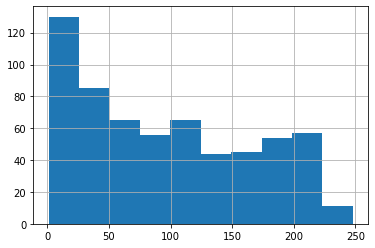

In [39]:
data_player['AB'].hist()
#there are some batter with 0 AB
#to evaluate which number indicate low AB points, distribution is observed

In [40]:
#Batter with AB less than 25 is selected in this analysis 
#reset_index(): reset the index of updated players'
cond = data_player['AB'] > 25
data_player = data_player[cond].reset_index()
data_player

,Team,Player,Age,AB,AVG,BB,H,HBP,HR,OBP,OPS,RBI,SF,SLG,XBH
0,ARI,Andrew Young,27,26,0.192,5,5,3,1,0.382,0.767,4,0,0.385,3
1,ARI,Carson Kelly,27,122,0.221,6,27,1,5,0.264,0.649,19,0,0.385,10
2,ARI,Christian Walker,30,218,0.271,19,59,3,7,0.333,0.792,34,3,0.459,26
3,ARI,Daulton Varsho,25,101,0.188,12,19,2,3,0.287,0.653,9,0,0.366,10
4,ARI,David Peralta,34,203,0.300,13,61,0,5,0.339,0.772,34,2,0.433,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,WAS,Starlin Castro,31,60,0.267,3,16,0,2,0.302,0.752,4,0,0.450,6
478,WAS,Trea Turner,28,233,0.335,22,78,2,12,0.394,0.982,41,2,0.588,31
479,WAS,Victor Robles,24,168,0.220,9,37,9,3,0.293,0.608,15,2,0.315,9
480,WAS,Yadiel Hernandez,33,26,0.192,1,5,0,1,0.214,0.637,6,1,0.423,4


In [44]:
#sorted based on players' performance (OBP>SLG>OPS>AVG)
#when there is a OBP tie between two players, batter with higher SLG will be considered 'better'
data_player = data_player.sort_values(by = ['OBP', 'SLG', 'OPS', 'AVG'], ascending=False)
data_player = data_player.reset_index(drop = True)
data_player.head(20)


,Team,Player,Age,AB,AVG,BB,H,HBP,HR,OBP,OPS,RBI,SF,SLG,XBH
0,WAS,Juan Soto,22,154,0.351,41,54,1,13,0.490,1.185,37,0,0.695,27
1,ATL,Freddie Freeman,31,214,0.341,45,73,3,13,0.462,1.102,53,0,0.640,37
2,WAS,Andrew Stevenson,27,41,0.366,5,15,1,2,0.447,1.179,12,0,0.732,10
3,PIT,Phillip Evans,28,39,0.359,5,14,1,1,0.444,0.931,9,0,0.487,3
4,PIT,Ke'Bryan Hayes,24,85,0.376,9,32,1,5,0.442,1.124,11,0,0.682,14
5,ATL,Marcell Ozuna,30,228,0.338,38,77,0,18,0.431,1.067,56,1,0.636,32
6,BOS,Mitch Moreland,35,67,0.328,11,22,1,8,0.430,1.176,21,0,0.746,12
7,TB,Yandy Diaz,30,114,0.307,23,35,1,2,0.428,0.814,11,0,0.386,5
8,NYM,Luis Guillorme,26,57,0.333,10,19,0,0,0.426,0.865,9,1,0.439,6
9,SF,Brandon Belt,33,149,0.309,30,46,0,9,0.425,1.016,30,0,0.591,23


In [72]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#this setting is to allow (-) sign on the graph
# matplotlib.rcParams['axes.unicode_minus'] = False

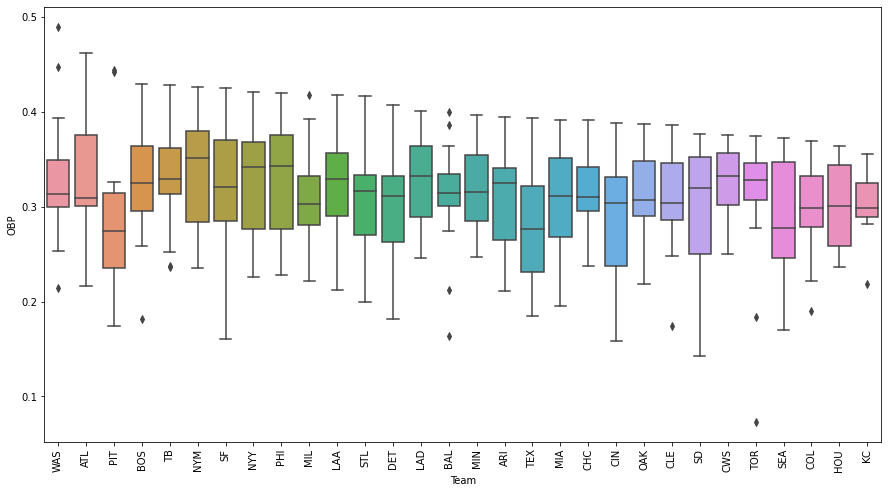

In [78]:
#each team's OBP distribution
#horizontal x-labels to vertical ==> .tick_params(axis='x', rotation=90) 
plt.figure(figsize=(15,8))
graph = sns.boxplot(data = data_player, x = 'Team', y = 'OBP').tick_params(axis='x', rotation=90)

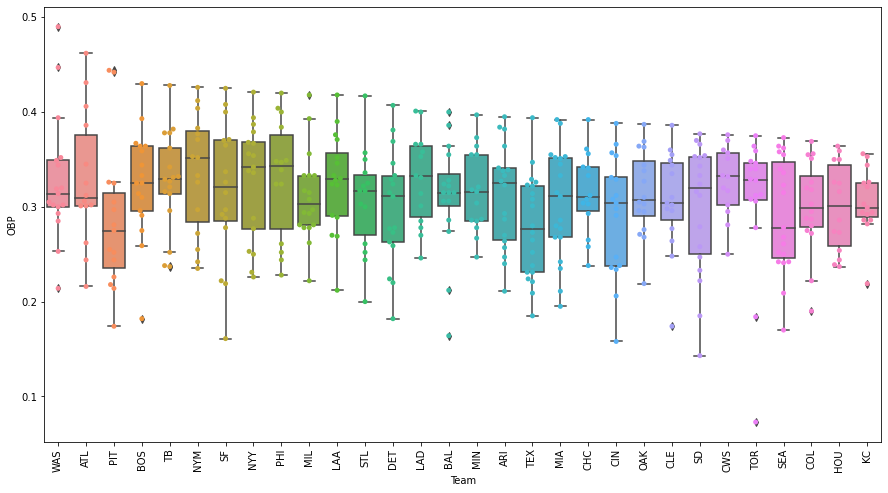

In [79]:
#swarmplot and boxplot
plt.figure(figsize=(15,8))
sns.swarmplot(data = data_player, x = 'Team', y = 'OBP').tick_params(axis='x', rotation=90)
sns.boxplot(data = data_player, x = 'Team', y = 'OBP').tick_params(axis='x', rotation=90)